# Neural Network (Desktop version)


With this Jupyter notebook i will execute several operation to have a funtional Neural Network.

This Notebook has been prepared to be used in a computer Desktop.

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import glob
import cv2

# Data pre-processing
# dimensions of our images.
img_width, img_height = 240, 135
num_classes = 6

commonURL = ""
train_data_dir = commonURL + 'data/train'
validation_data_dir = commonURL + 'data/validation'

# The Neural Network Architecture

In [14]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import regularizers
from keras import backend as K
from keras.applications import vgg16
from keras.optimizers import Adam
from keras.layers import Input

input_tensor = Input(shape=(img_width, img_height,3))

model = Sequential()
model.add(Conv2D(64, (10,10), padding='same', kernel_regularizer=regularizers.l2(0.0001), input_shape = (img_width, img_height,3)))
model.add(BatchNormalization())
model.add(Activation("elu"))
model.add(Conv2D(64, (20,20), padding='same', kernel_regularizer=regularizers.l2(0.0001)))
model.add(BatchNormalization())
model.add(Activation("elu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(64, (20,20), padding='same', kernel_regularizer=regularizers.l2(0.0001)))
model.add(BatchNormalization())
model.add(Activation("elu"))
model.add(Conv2D(64, (10,10), padding='same', kernel_regularizer=regularizers.l2(0.0001)))
model.add(BatchNormalization())
model.add(Activation("elu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(128, (10,10), padding='same', kernel_regularizer=regularizers.l2(0.0001)))
model.add(BatchNormalization())
model.add(Activation("elu"))
model.add(Conv2D(128, (5,5), padding='same', kernel_regularizer=regularizers.l2(0.0001)))
model.add(BatchNormalization())
model.add(Activation("elu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(64, (10,10), padding='same', kernel_regularizer=regularizers.l2(0.0001)))
model.add(BatchNormalization())
model.add(Activation("elu"))
model.add(Conv2D(64, (5,5), padding='same', kernel_regularizer=regularizers.l2(0.0001)))
model.add(BatchNormalization())
model.add(Activation("elu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(6, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 240, 135, 64)      19264     
_________________________________________________________________
batch_normalization_17 (Batc (None, 240, 135, 64)      256       
_________________________________________________________________
activation_17 (Activation)   (None, 240, 135, 64)      0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 240, 135, 64)      1638464   
_________________________________________________________________
batch_normalization_18 (Batc (None, 240, 135, 64)      256       
_________________________________________________________________
activation_18 (Activation)   (None, 240, 135, 64)      0         
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 120, 67, 64)       0         
__________

# Training

In [0]:
nb_train_samples = 25000
nb_validation_samples = 10000
epochs = 10
batch_size = 64

# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator( rotation_range = 180)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator()

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

# Training
import time
start = time.time()
history = model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)
end = time.time()

Found 7226 images belonging to 6 classes.
Found 1941 images belonging to 6 classes.
Instructions for updating:
Use tf.cast instead.
Epoch 1/10
390/390 [==============================] - 5741s 15s/step - loss: 0.4427 - acc: 0.8699 - val_loss: 11.2063 - val_acc: 0.2735
Epoch 2/10
390/390 [==============================] - 3482s 9s/step - loss: 0.1886 - acc: 0.9651 - val_loss: 5.7791 - val_acc: 0.6190
Epoch 3/10
390/390 [==============================] - 3471s 9s/step - loss: 0.1703 - acc: 0.9760 - val_loss: 6.6784 - val_acc: 0.5083
Epoch 4/10
390/390 [==============================] - 3472s 9s/step - loss: 0.1634 - acc: 0.9774 - val_loss: 5.8888 - val_acc: 0.5243
Epoch 5/10
390/390 [==============================] - 3471s 9s/step - loss: 0.1566 - acc: 0.9789 - val_loss: 6.2491 - val_acc: 0.5064
Epoch 6/10
390/390 [==============================] - 3472s 9s/step - loss: 0.1414 - acc: 0.9832 - val_loss: 10.3598 - val_acc: 0.3488
Epoch 7/10
390/390 [==============================] - 3464s 9

Loss:  9.76963717583709 Accuracy:  0.36784297782959197


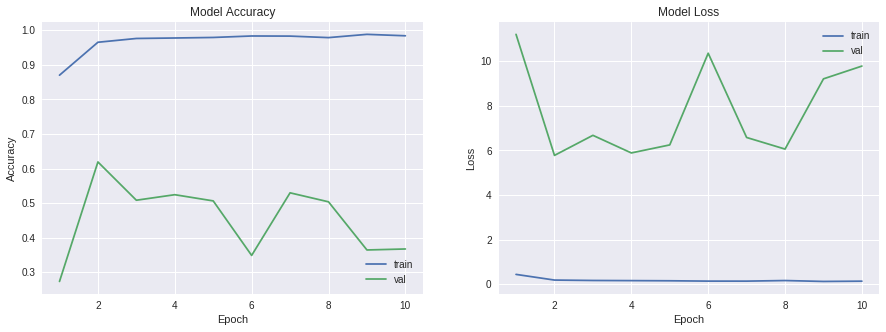

Training MLP took 36974.61120891571 seconds


In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # Summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()
    
#del model

#from keras.models import load_model

#print("Loading Neural Network...")
#model = load_model(commonURL + 'my_first_neural_network.h5')
#print("Neural Network loaded")
    
score = model.evaluate_generator(validation_generator, nb_validation_samples/batch_size, workers=1)

print("Loss: ", score[0], "Accuracy: ", score[1])

plot_model_history(history)

print("Training MLP took " + str(end - start) + " seconds")

model.save(commonURL + 'my_first_neural_network.h5')

# Tests

In [ ]:
del model

In [ ]:
from keras.models import load_model
model = load_model(commonURL + 'my_first_neural_network.h5')

data/validation\Nodo1
Image: data/validation\Nodo1\img1000.jpg
	Real label: 	Node0 - 0.021718860080000013%
	Prediction: 	Node3 - 71.20678424835205%
Num. true positives: 0
Total Images: 1
true/total: 0.0
Image: data/validation\Nodo1\img1009.jpg
	Real label: 	Node0 - 0.003447343988227658%
	Prediction: 	Node3 - 96.23783230781555%
Num. true positives: 0
Total Images: 2
true/total: 0.0
Image: data/validation\Nodo1\img101.jpg
	Real label: 	Node0 - 0.20714127458631992%
	Prediction: 	Node3 - 58.3636999130249%
Num. true positives: 0
Total Images: 3
true/total: 0.0
Image: data/validation\Nodo1\img1017.jpg
	Real label: 	Node0 - 0.00210100242838962%
	Prediction: 	Node3 - 92.14723706245422%
Num. true positives: 0
Total Images: 4
true/total: 0.0
Image: data/validation\Nodo1\img1022.jpg
	Real label: 	Node0 - 0.006082580148358829%
	Prediction: 	Node3 - 78.79247665405273%
Num. true positives: 0
Total Images: 5
true/total: 0.0
Image: data/validation\Nodo1\img1025.jpg
	Real label: 	Node0 - 0.016978802159

	Real label: 	Node0 - 0.20581488497555256%
	Prediction: 	Node3 - 75.98854303359985%
Num. true positives: 0
Total Images: 46
true/total: 0.0
Image: data/validation\Nodo1\img1322.jpg
	Real label: 	Node0 - 0.28851539827883244%
	Prediction: 	Node3 - 70.35932540893555%
Num. true positives: 0
Total Images: 47
true/total: 0.0
Image: data/validation\Nodo1\img134.jpg
	Real label: 	Node0 - 0.2582116751000285%
	Prediction: 	Node3 - 54.18260097503662%
Num. true positives: 0
Total Images: 48
true/total: 0.0
Image: data/validation\Nodo1\img1341.jpg
	Real label: 	Node0 - 0.32735324930399656%
	Prediction: 	Node3 - 62.50098943710327%
Num. true positives: 0
Total Images: 49
true/total: 0.0
Image: data/validation\Nodo1\img1343.jpg
	Real label: 	Node0 - 0.300784083083272%
	Prediction: 	Node3 - 53.89160513877869%
Num. true positives: 0
Total Images: 50
true/total: 0.0
Image: data/validation\Nodo1\img1347.jpg
	Real label: 	Node0 - 0.29057066421955824%
	Prediction: 	Node5 - 51.562559604644775%
Num. true posi

	Real label: 	Node0 - 0.39727124385535717%
	Prediction: 	Node3 - 69.36851143836975%
Num. true positives: 0
Total Images: 92
true/total: 0.0
Image: data/validation\Nodo1\img1599.jpg
	Real label: 	Node0 - 0.31110295094549656%
	Prediction: 	Node3 - 66.25751256942749%
Num. true positives: 0
Total Images: 93
true/total: 0.0
Image: data/validation\Nodo1\img1600.jpg
	Real label: 	Node0 - 0.5882992874830961%
	Prediction: 	Node3 - 63.4537935256958%
Num. true positives: 0
Total Images: 94
true/total: 0.0
Image: data/validation\Nodo1\img1607.jpg
	Real label: 	Node0 - 0.6337420083582401%
	Prediction: 	Node3 - 67.74200201034546%
Num. true positives: 0
Total Images: 95
true/total: 0.0
Image: data/validation\Nodo1\img1628.jpg
	Real label: 	Node0 - 0.8906491100788116%
	Prediction: 	Node5 - 49.30819571018219%
Num. true positives: 0
Total Images: 96
true/total: 0.0
Image: data/validation\Nodo1\img1630.jpg
	Real label: 	Node0 - 0.846176128834486%
	Prediction: 	Node5 - 66.69352054595947%
Num. true positiv

	Real label: 	Node1 - 18.90691965818405%
	Prediction: 	Node3 - 60.50509810447693%
Num. true positives: 7
Total Images: 137
true/total: 0.051094890510948905
Image: data/validation\Nodo2\img5357.jpg
	Real label: 	Node1 - 20.292627811431885%
	Prediction: 	Node3 - 52.456849813461304%
Num. true positives: 7
Total Images: 138
true/total: 0.050724637681159424
Image: data/validation\Nodo2\img5361.jpg
	Real label: 	Node1 - 21.908465027809143%
	Prediction: 	Node3 - 71.94485068321228%
Num. true positives: 7
Total Images: 139
true/total: 0.050359712230215826
Image: data/validation\Nodo2\img5365.jpg
	Real label: 	Node1 - 5.966442450881004%
	Prediction: 	Node3 - 92.56768822669983%
Num. true positives: 7
Total Images: 140
true/total: 0.05
Image: data/validation\Nodo2\img5367.jpg
	Real label: 	Node1 - 4.445825517177582%
	Prediction: 	Node3 - 85.7698142528534%
Num. true positives: 7
Total Images: 141
true/total: 0.04964539007092199
Image: data/validation\Nodo2\img5368.jpg
	Real label: 	Node1 - 8.879330

	Real label: 	Node1 - 19.904714822769165%
	Prediction: 	Node3 - 69.53983902931213%
Num. true positives: 7
Total Images: 179
true/total: 0.03910614525139665
Image: data/validation\Nodo2\img5644.jpg
	Real label: 	Node1 - 5.178540199995041%
	Prediction: 	Node3 - 56.38149380683899%
Num. true positives: 7
Total Images: 180
true/total: 0.03888888888888889
Image: data/validation\Nodo2\img5651.jpg
	Real label: 	Node1 - 5.430615320801735%
	Prediction: 	Node5 - 54.99081611633301%
Num. true positives: 7
Total Images: 181
true/total: 0.03867403314917127
Image: data/validation\Nodo2\img5655.jpg
	Real label: 	Node1 - 27.42113769054413%
	Prediction: 	Node5 - 48.362115025520325%
Num. true positives: 7
Total Images: 182
true/total: 0.038461538461538464
Image: data/validation\Nodo2\img5659.jpg
	Real label: 	Node1 - 22.322243452072144%
	Prediction: 	Node3 - 48.69806468486786%
Num. true positives: 7
Total Images: 183
true/total: 0.03825136612021858
Image: data/validation\Nodo2\img5661.jpg
	Real label: 	No

	Real label: 	Node1 - 4.297635704278946%
	Prediction: 	Node3 - 90.72173833847046%
Num. true positives: 7
Total Images: 221
true/total: 0.03167420814479638
Image: data/validation\Nodo2\img5833.jpg
	Real label: 	Node1 - 4.435015842318535%
	Prediction: 	Node3 - 94.61466670036316%
Num. true positives: 7
Total Images: 222
true/total: 0.03153153153153153
Image: data/validation\Nodo2\img5836.jpg
	Real label: 	Node1 - 2.5351902469992638%
	Prediction: 	Node3 - 95.99162340164185%
Num. true positives: 7
Total Images: 223
true/total: 0.03139013452914798
Image: data/validation\Nodo2\img5844.jpg
	Real label: 	Node1 - 9.674379974603653%
	Prediction: 	Node3 - 64.228355884552%
Num. true positives: 7
Total Images: 224
true/total: 0.03125
Image: data/validation\Nodo2\img5850.jpg
	Real label: 	Node1 - 4.095609113574028%
	Prediction: 	Node3 - 90.7773494720459%
Num. true positives: 7
Total Images: 225
true/total: 0.03111111111111111
Image: data/validation\Nodo2\img5852.jpg
	Real label: 	Node1 - 5.0558544695

	Real label: 	Node1 - 0.7065600715577602%
	Prediction: 	Node3 - 98.0652928352356%
Num. true positives: 7
Total Images: 263
true/total: 0.026615969581749048
Image: data/validation\Nodo2\img6141.jpg
	Real label: 	Node1 - 0.3649270860478282%
	Prediction: 	Node3 - 98.7027108669281%
Num. true positives: 7
Total Images: 264
true/total: 0.026515151515151516
Image: data/validation\Nodo2\img6143.jpg
	Real label: 	Node1 - 0.48659807071089745%
	Prediction: 	Node3 - 98.32768440246582%
Num. true positives: 7
Total Images: 265
true/total: 0.026415094339622643
Image: data/validation\Nodo2\img6158.jpg
	Real label: 	Node1 - 2.244197763502598%
	Prediction: 	Node3 - 93.13205480575562%
Num. true positives: 7
Total Images: 266
true/total: 0.02631578947368421
Image: data/validation\Nodo2\img6159.jpg
	Real label: 	Node1 - 2.014550380408764%
	Prediction: 	Node3 - 95.96248865127563%
Num. true positives: 7
Total Images: 267
true/total: 0.026217228464419477
Image: data/validation\Nodo2\img6175.jpg
	Real label: 	

	Real label: 	Node1 - 4.06431145966053%
	Prediction: 	Node3 - 94.41076517105103%
Num. true positives: 7
Total Images: 305
true/total: 0.022950819672131147
Image: data/validation\Nodo2\img6500.jpg
	Real label: 	Node1 - 1.6144771128892899%
	Prediction: 	Node3 - 96.33581638336182%
Num. true positives: 7
Total Images: 306
true/total: 0.02287581699346405
Image: data/validation\Nodo2\img6514.jpg
	Real label: 	Node1 - 0.9255658835172653%
	Prediction: 	Node3 - 96.52605056762695%
Num. true positives: 7
Total Images: 307
true/total: 0.02280130293159609
Image: data/validation\Nodo2\img6518.jpg
	Real label: 	Node1 - 1.8266243860125542%
	Prediction: 	Node3 - 95.99241018295288%
Num. true positives: 7
Total Images: 308
true/total: 0.022727272727272728
Image: data/validation\Nodo2\img6527.jpg
	Real label: 	Node1 - 1.4447816647589207%
	Prediction: 	Node3 - 94.69947218894958%
Num. true positives: 7
Total Images: 309
true/total: 0.022653721682847898
Image: data/validation\Nodo2\img6534.jpg
	Real label: 	

	Real label: 	Node1 - 6.732078641653061%
	Prediction: 	Node3 - 66.50294065475464%
Num. true positives: 7
Total Images: 347
true/total: 0.020172910662824207
Image: data/validation\Nodo2\img6796.jpg
	Real label: 	Node1 - 7.954059541225433%
	Prediction: 	Node3 - 69.08167004585266%
Num. true positives: 7
Total Images: 348
true/total: 0.020114942528735632
Image: data/validation\Nodo2\img6798.jpg
	Real label: 	Node1 - 9.850122779607773%
	Prediction: 	Node3 - 78.2407283782959%
Num. true positives: 7
Total Images: 349
true/total: 0.02005730659025788
data/validation\Nodo3
Image: data/validation\Nodo3\img10001.jpg
	Real label: 	Node2 - 0.009089247032534331%
	Prediction: 	Node1 - 51.10328197479248%
Num. true positives: 7
Total Images: 350
true/total: 0.02
Image: data/validation\Nodo3\img10002.jpg
	Real label: 	Node2 - 0.006458540156017989%
	Prediction: 	Node1 - 52.6599645614624%
Num. true positives: 7
Total Images: 351
true/total: 0.019943019943019943
Image: data/validation\Nodo3\img10007.jpg
	Re

	Real label: 	Node2 - 0.0006846726591902552%
	Prediction: 	Node3 - 91.40051007270813%
Num. true positives: 7
Total Images: 388
true/total: 0.01804123711340206
Image: data/validation\Nodo3\img10190.jpg
	Real label: 	Node2 - 0.0009284157385991421%
	Prediction: 	Node3 - 78.5506546497345%
Num. true positives: 7
Total Images: 389
true/total: 0.017994858611825194
Image: data/validation\Nodo3\img10193.jpg
	Real label: 	Node2 - 0.0003093789018748794%
	Prediction: 	Node3 - 84.5008909702301%
Num. true positives: 7
Total Images: 390
true/total: 0.017948717948717947
Image: data/validation\Nodo3\img10207.jpg
	Real label: 	Node2 - 0.0007956648005347233%
	Prediction: 	Node3 - 44.011229276657104%
Num. true positives: 7
Total Images: 391
true/total: 0.017902813299232736
Image: data/validation\Nodo3\img10222.jpg
	Real label: 	Node2 - 0.0030921277357265353%
	Prediction: 	Node3 - 47.684046626091%
Num. true positives: 7
Total Images: 392
true/total: 0.017857142857142856
Image: data/validation\Nodo3\img1022

	Real label: 	Node2 - 0.00037606262139888713%
	Prediction: 	Node1 - 63.40680122375488%
Num. true positives: 7
Total Images: 429
true/total: 0.016317016317016316
Image: data/validation\Nodo3\img10478.jpg
	Real label: 	Node2 - 0.000572311819269089%
	Prediction: 	Node1 - 59.44820046424866%
Num. true positives: 7
Total Images: 430
true/total: 0.01627906976744186
Image: data/validation\Nodo3\img10480.jpg
	Real label: 	Node2 - 0.0007211698175524361%
	Prediction: 	Node1 - 56.142520904541016%
Num. true positives: 7
Total Images: 431
true/total: 0.016241299303944315
Image: data/validation\Nodo3\img10485.jpg
	Real label: 	Node2 - 0.0005940842129348312%
	Prediction: 	Node1 - 55.488961935043335%
Num. true positives: 7
Total Images: 432
true/total: 0.016203703703703703
Image: data/validation\Nodo3\img10494.jpg
	Real label: 	Node2 - 0.0007134169663913781%
	Prediction: 	Node3 - 59.296417236328125%
Num. true positives: 7
Total Images: 433
true/total: 0.016166281755196306
Image: data/validation\Nodo3\i

	Real label: 	Node2 - 0.008898184751160443%
	Prediction: 	Node1 - 43.833357095718384%
Num. true positives: 7
Total Images: 470
true/total: 0.014893617021276596
Image: data/validation\Nodo3\img10763.jpg
	Real label: 	Node2 - 0.010303437011316419%
	Prediction: 	Node1 - 67.99494624137878%
Num. true positives: 7
Total Images: 471
true/total: 0.014861995753715499
Image: data/validation\Nodo3\img10767.jpg
	Real label: 	Node2 - 0.005233182673691772%
	Prediction: 	Node1 - 73.71073961257935%
Num. true positives: 7
Total Images: 472
true/total: 0.014830508474576272
Image: data/validation\Nodo3\img10768.jpg
	Real label: 	Node2 - 0.006752706394763663%
	Prediction: 	Node1 - 66.2950336933136%
Num. true positives: 7
Total Images: 473
true/total: 0.014799154334038054
Image: data/validation\Nodo3\img10771.jpg
	Real label: 	Node2 - 0.013503828085958958%
	Prediction: 	Node1 - 57.209086418151855%
Num. true positives: 7
Total Images: 474
true/total: 0.014767932489451477
Image: data/validation\Nodo3\img1078

	Real label: 	Node2 - 0.3183788387104869%
	Prediction: 	Node3 - 45.141515135765076%
Num. true positives: 7
Total Images: 512
true/total: 0.013671875
Image: data/validation\Nodo3\img11089.jpg
	Real label: 	Node2 - 0.21987699437886477%
	Prediction: 	Node5 - 42.72261559963226%
Num. true positives: 7
Total Images: 513
true/total: 0.01364522417153996
Image: data/validation\Nodo3\img11092.jpg
	Real label: 	Node2 - 0.3291491651907563%
	Prediction: 	Node3 - 40.212371945381165%
Num. true positives: 7
Total Images: 514
true/total: 0.013618677042801557
Image: data/validation\Nodo3\img11095.jpg
	Real label: 	Node2 - 0.3031502943485975%
	Prediction: 	Node3 - 38.48397731781006%
Num. true positives: 7
Total Images: 515
true/total: 0.013592233009708738
Image: data/validation\Nodo3\img11104.jpg
	Real label: 	Node2 - 0.14783843653276563%
	Prediction: 	Node5 - 46.23343348503113%
Num. true positives: 7
Total Images: 516
true/total: 0.013565891472868217
Image: data/validation\Nodo3\img11118.jpg
	Real label

	Real label: 	Node2 - 0.7671310566365719%
	Prediction: 	Node3 - 44.18540000915527%
Num. true positives: 7
Total Images: 554
true/total: 0.01263537906137184
Image: data/validation\Nodo3\img11371.jpg
	Real label: 	Node2 - 0.9543233551084995%
	Prediction: 	Node3 - 46.958255767822266%
Num. true positives: 7
Total Images: 555
true/total: 0.012612612612612612
Image: data/validation\Nodo3\img11376.jpg
	Real label: 	Node2 - 0.8606066927313805%
	Prediction: 	Node3 - 43.8574492931366%
Num. true positives: 7
Total Images: 556
true/total: 0.012589928057553957
Image: data/validation\Nodo3\img11378.jpg
	Real label: 	Node2 - 0.4928026348352432%
	Prediction: 	Node3 - 36.11207604408264%
Num. true positives: 7
Total Images: 557
true/total: 0.012567324955116697
Image: data/validation\Nodo3\img11384.jpg
	Real label: 	Node2 - 0.5449586547911167%
	Prediction: 	Node5 - 59.89317297935486%
Num. true positives: 7
Total Images: 558
true/total: 0.012544802867383513
Image: data/validation\Nodo3\img11389.jpg
	Real 

	Real label: 	Node2 - 0.037310237530618906%
	Prediction: 	Node3 - 49.908074736595154%
Num. true positives: 7
Total Images: 596
true/total: 0.01174496644295302
Image: data/validation\Nodo3\img8954.jpg
	Real label: 	Node2 - 0.05051984917372465%
	Prediction: 	Node3 - 42.655348777770996%
Num. true positives: 7
Total Images: 597
true/total: 0.011725293132328308
Image: data/validation\Nodo3\img8968.jpg
	Real label: 	Node2 - 0.026922664255835116%
	Prediction: 	Node3 - 63.742876052856445%
Num. true positives: 7
Total Images: 598
true/total: 0.011705685618729096
Image: data/validation\Nodo3\img8969.jpg
	Real label: 	Node2 - 0.02277275489177555%
	Prediction: 	Node3 - 46.830520033836365%
Num. true positives: 7
Total Images: 599
true/total: 0.011686143572621035
Image: data/validation\Nodo3\img8975.jpg
	Real label: 	Node2 - 0.011622306919889525%
	Prediction: 	Node3 - 64.97315764427185%
Num. true positives: 7
Total Images: 600
true/total: 0.011666666666666667
Image: data/validation\Nodo3\img8980.jpg

	Real label: 	Node2 - 0.005708010939997621%
	Prediction: 	Node1 - 41.0832017660141%
Num. true positives: 7
Total Images: 638
true/total: 0.0109717868338558
Image: data/validation\Nodo3\img9235.jpg
	Real label: 	Node2 - 0.005496962694451213%
	Prediction: 	Node3 - 39.62748050689697%
Num. true positives: 7
Total Images: 639
true/total: 0.010954616588419406
Image: data/validation\Nodo3\img9245.jpg
	Real label: 	Node2 - 0.005813241295982152%
	Prediction: 	Node1 - 48.3744353055954%
Num. true positives: 7
Total Images: 640
true/total: 0.0109375
Image: data/validation\Nodo3\img9249.jpg
	Real label: 	Node2 - 0.009142480848822743%
	Prediction: 	Node1 - 58.691561222076416%
Num. true positives: 7
Total Images: 641
true/total: 0.0109204368174727
Image: data/validation\Nodo3\img9261.jpg
	Real label: 	Node2 - 0.012666617112699896%
	Prediction: 	Node1 - 41.880881786346436%
Num. true positives: 7
Total Images: 642
true/total: 0.010903426791277258
Image: data/validation\Nodo3\img9266.jpg
	Real label: 	N

	Real label: 	Node3 - 28.684034943580627%
	Prediction: 	Node1 - 38.00842463970184%
Num. true positives: 19
Total Images: 679
true/total: 0.027982326951399118
Image: data/validation\Nodo4\img11528.jpg
	Real label: 	Node3 - 34.414297342300415%
	Prediction: 	Node1 - 36.69494986534119%
Num. true positives: 19
Total Images: 680
true/total: 0.027941176470588237
Image: data/validation\Nodo4\img11529.jpg
	Real label: 	Node3 - 24.69637393951416%
	Prediction: 	Node1 - 61.827051639556885%
Num. true positives: 19
Total Images: 681
true/total: 0.027900146842878122
Image: data/validation\Nodo4\img11532.jpg
	Real label: 	Node3 - 45.083045959472656%
	Prediction: 	Node3 - 45.083045959472656%
Num. true positives: 20
Total Images: 682
true/total: 0.02932551319648094
Image: data/validation\Nodo4\img11538.jpg
	Real label: 	Node3 - 18.239028751850128%
	Prediction: 	Node1 - 42.22864210605621%
Num. true positives: 20
Total Images: 683
true/total: 0.029282576866764276
Image: data/validation\Nodo4\img11545.jpg


	Real label: 	Node3 - 54.350244998931885%
	Prediction: 	Node3 - 54.350244998931885%
Num. true positives: 42
Total Images: 721
true/total: 0.05825242718446602
Image: data/validation\Nodo4\img11789.jpg
	Real label: 	Node3 - 53.92385125160217%
	Prediction: 	Node3 - 53.92385125160217%
Num. true positives: 43
Total Images: 722
true/total: 0.05955678670360111
Image: data/validation\Nodo4\img11791.jpg
	Real label: 	Node3 - 57.120853662490845%
	Prediction: 	Node3 - 57.120853662490845%
Num. true positives: 44
Total Images: 723
true/total: 0.06085753803596127
Image: data/validation\Nodo4\img11796.jpg
	Real label: 	Node3 - 59.30110812187195%
	Prediction: 	Node3 - 59.30110812187195%
Num. true positives: 45
Total Images: 724
true/total: 0.062154696132596686
Image: data/validation\Nodo4\img11805.jpg
	Real label: 	Node3 - 39.88246023654938%
	Prediction: 	Node3 - 39.88246023654938%
Num. true positives: 46
Total Images: 725
true/total: 0.06344827586206897
Image: data/validation\Nodo4\img11811.jpg
	Real

	Real label: 	Node3 - 61.09919548034668%
	Prediction: 	Node3 - 61.09919548034668%
Num. true positives: 80
Total Images: 763
true/total: 0.10484927916120576
Image: data/validation\Nodo4\img12041.jpg
	Real label: 	Node3 - 68.62270832061768%
	Prediction: 	Node3 - 68.62270832061768%
Num. true positives: 81
Total Images: 764
true/total: 0.10602094240837696
Image: data/validation\Nodo4\img12045.jpg
	Real label: 	Node3 - 69.33373212814331%
	Prediction: 	Node3 - 69.33373212814331%
Num. true positives: 82
Total Images: 765
true/total: 0.10718954248366012
Image: data/validation\Nodo4\img12049.jpg
	Real label: 	Node3 - 34.404316544532776%
	Prediction: 	Node5 - 53.99843454360962%
Num. true positives: 82
Total Images: 766
true/total: 0.10704960835509138
Image: data/validation\Nodo4\img12050.jpg
	Real label: 	Node3 - 43.62272322177887%
	Prediction: 	Node3 - 43.62272322177887%
Num. true positives: 83
Total Images: 767
true/total: 0.10821382007822686
Image: data/validation\Nodo4\img12054.jpg
	Real lab

	Real label: 	Node3 - 81.35001063346863%
	Prediction: 	Node3 - 81.35001063346863%
Num. true positives: 116
Total Images: 805
true/total: 0.14409937888198757
Image: data/validation\Nodo4\img12300.jpg
	Real label: 	Node3 - 81.52546882629395%
	Prediction: 	Node3 - 81.52546882629395%
Num. true positives: 117
Total Images: 806
true/total: 0.14516129032258066
Image: data/validation\Nodo4\img12306.jpg
	Real label: 	Node3 - 89.47275876998901%
	Prediction: 	Node3 - 89.47275876998901%
Num. true positives: 118
Total Images: 807
true/total: 0.14622057001239158
Image: data/validation\Nodo4\img12308.jpg
	Real label: 	Node3 - 90.51743149757385%
	Prediction: 	Node3 - 90.51743149757385%
Num. true positives: 119
Total Images: 808
true/total: 0.14727722772277227
Image: data/validation\Nodo4\img12317.jpg
	Real label: 	Node3 - 85.06200313568115%
	Prediction: 	Node3 - 85.06200313568115%
Num. true positives: 120
Total Images: 809
true/total: 0.14833127317676142
Image: data/validation\Nodo4\img12318.jpg
	Real

	Real label: 	Node3 - 30.097001791000366%
	Prediction: 	Node1 - 36.24090254306793%
Num. true positives: 152
Total Images: 847
true/total: 0.179456906729634
Image: data/validation\Nodo4\img12599.jpg
	Real label: 	Node3 - 26.20956003665924%
	Prediction: 	Node5 - 44.218552112579346%
Num. true positives: 152
Total Images: 848
true/total: 0.1792452830188679
Image: data/validation\Nodo4\img12601.jpg
	Real label: 	Node3 - 26.59289836883545%
	Prediction: 	Node1 - 49.11927282810211%
Num. true positives: 152
Total Images: 849
true/total: 0.1790341578327444
Image: data/validation\Nodo4\img12602.jpg
	Real label: 	Node3 - 42.9050475358963%
	Prediction: 	Node3 - 42.9050475358963%
Num. true positives: 153
Total Images: 850
true/total: 0.18
Image: data/validation\Nodo4\img12604.jpg
	Real label: 	Node3 - 50.36073923110962%
	Prediction: 	Node3 - 50.36073923110962%
Num. true positives: 154
Total Images: 851
true/total: 0.1809635722679201
Image: data/validation\Nodo4\img12627.jpg
	Real label: 	Node3 - 25.

	Real label: 	Node3 - 86.08585000038147%
	Prediction: 	Node3 - 86.08585000038147%
Num. true positives: 174
Total Images: 889
true/total: 0.19572553430821146
Image: data/validation\Nodo4\img12911.jpg
	Real label: 	Node3 - 88.28288316726685%
	Prediction: 	Node3 - 88.28288316726685%
Num. true positives: 175
Total Images: 890
true/total: 0.19662921348314608
Image: data/validation\Nodo4\img12916.jpg
	Real label: 	Node3 - 80.94167113304138%
	Prediction: 	Node3 - 80.94167113304138%
Num. true positives: 176
Total Images: 891
true/total: 0.19753086419753085
Image: data/validation\Nodo4\img12922.jpg
	Real label: 	Node3 - 88.4834885597229%
	Prediction: 	Node3 - 88.4834885597229%
Num. true positives: 177
Total Images: 892
true/total: 0.1984304932735426
Image: data/validation\Nodo4\img12928.jpg
	Real label: 	Node3 - 86.77170872688293%
	Prediction: 	Node3 - 86.77170872688293%
Num. true positives: 178
Total Images: 893
true/total: 0.19932810750279956
Image: data/validation\Nodo4\img12934.jpg
	Real la

	Real label: 	Node3 - 84.83337163925171%
	Prediction: 	Node3 - 84.83337163925171%
Num. true positives: 216
Total Images: 931
true/total: 0.23200859291084855
Image: data/validation\Nodo4\img13186.jpg
	Real label: 	Node3 - 48.705291748046875%
	Prediction: 	Node3 - 48.705291748046875%
Num. true positives: 217
Total Images: 932
true/total: 0.23283261802575106
Image: data/validation\Nodo4\img13187.jpg
	Real label: 	Node3 - 40.214693546295166%
	Prediction: 	Node1 - 41.627466678619385%
Num. true positives: 217
Total Images: 933
true/total: 0.23258306538049303
Image: data/validation\Nodo4\img13191.jpg
	Real label: 	Node3 - 50.94333291053772%
	Prediction: 	Node3 - 50.94333291053772%
Num. true positives: 218
Total Images: 934
true/total: 0.2334047109207709
Image: data/validation\Nodo4\img13199.jpg
	Real label: 	Node3 - 61.72651648521423%
	Prediction: 	Node3 - 61.72651648521423%
Num. true positives: 219
Total Images: 935
true/total: 0.23422459893048128
Image: data/validation\Nodo4\img13209.jpg
	R

	Real label: 	Node3 - 87.289959192276%
	Prediction: 	Node3 - 87.289959192276%
Num. true positives: 257
Total Images: 973
true/total: 0.2641315519013361
Image: data/validation\Nodo4\img13487.jpg
	Real label: 	Node3 - 88.70646953582764%
	Prediction: 	Node3 - 88.70646953582764%
Num. true positives: 258
Total Images: 974
true/total: 0.2648870636550308
Image: data/validation\Nodo4\img13513.jpg
	Real label: 	Node3 - 89.13218379020691%
	Prediction: 	Node3 - 89.13218379020691%
Num. true positives: 259
Total Images: 975
true/total: 0.26564102564102565
Image: data/validation\Nodo4\img13523.jpg
	Real label: 	Node3 - 93.88309717178345%
	Prediction: 	Node3 - 93.88309717178345%
Num. true positives: 260
Total Images: 976
true/total: 0.26639344262295084
Image: data/validation\Nodo4\img13532.jpg
	Real label: 	Node3 - 88.13294172286987%
	Prediction: 	Node3 - 88.13294172286987%
Num. true positives: 261
Total Images: 977
true/total: 0.2671443193449335
Image: data/validation\Nodo4\img13564.jpg
	Real label:

	Real label: 	Node4 - 0.0003585843614928308%
	Prediction: 	Node3 - 86.8395209312439%
Num. true positives: 287
Total Images: 1015
true/total: 0.2827586206896552
Image: data/validation\Nodo5\img16664.jpg
	Real label: 	Node4 - 0.0001278186005038151%
	Prediction: 	Node3 - 92.85603761672974%
Num. true positives: 287
Total Images: 1016
true/total: 0.2824803149606299
Image: data/validation\Nodo5\img16668.jpg
	Real label: 	Node4 - 0.00028441679660318187%
	Prediction: 	Node3 - 93.01726818084717%
Num. true positives: 287
Total Images: 1017
true/total: 0.28220255653883974
Image: data/validation\Nodo5\img16675.jpg
	Real label: 	Node4 - 0.0004923824690195033%
	Prediction: 	Node3 - 91.55598282814026%
Num. true positives: 287
Total Images: 1018
true/total: 0.2819253438113949
Image: data/validation\Nodo5\img16682.jpg
	Real label: 	Node4 - 0.0003920258222933626%
	Prediction: 	Node3 - 79.35981154441833%
Num. true positives: 287
Total Images: 1019
true/total: 0.281648675171737
Image: data/validation\Nodo

	Real label: 	Node4 - 0.0028553649826790206%
	Prediction: 	Node3 - 66.62498712539673%
Num. true positives: 287
Total Images: 1056
true/total: 0.27178030303030304
Image: data/validation\Nodo5\img16934.jpg
	Real label: 	Node4 - 0.003253405520808883%
	Prediction: 	Node3 - 76.70185565948486%
Num. true positives: 287
Total Images: 1057
true/total: 0.271523178807947
Image: data/validation\Nodo5\img16935.jpg
	Real label: 	Node4 - 0.0015589013855787925%
	Prediction: 	Node3 - 73.75301718711853%
Num. true positives: 287
Total Images: 1058
true/total: 0.2712665406427221
Image: data/validation\Nodo5\img16936.jpg
	Real label: 	Node4 - 0.002129849417542573%
	Prediction: 	Node3 - 72.57012724876404%
Num. true positives: 287
Total Images: 1059
true/total: 0.27101038715769593
Image: data/validation\Nodo5\img16944.jpg
	Real label: 	Node4 - 0.0001737933189360774%
	Prediction: 	Node3 - 95.23135423660278%
Num. true positives: 287
Total Images: 1060
true/total: 0.27075471698113207
Image: data/validation\Nodo

	Real label: 	Node4 - 0.12669172137975693%
	Prediction: 	Node3 - 69.60921883583069%
Num. true positives: 287
Total Images: 1097
true/total: 0.26162260711030083
Image: data/validation\Nodo5\img17202.jpg
	Real label: 	Node4 - 0.12481663143262267%
	Prediction: 	Node3 - 75.0867247581482%
Num. true positives: 287
Total Images: 1098
true/total: 0.26138433515482695
Image: data/validation\Nodo5\img17204.jpg
	Real label: 	Node4 - 0.03284651611465961%
	Prediction: 	Node3 - 60.4666531085968%
Num. true positives: 287
Total Images: 1099
true/total: 0.2611464968152866
Image: data/validation\Nodo5\img17208.jpg
	Real label: 	Node4 - 0.05423427210189402%
	Prediction: 	Node3 - 74.41136837005615%
Num. true positives: 287
Total Images: 1100
true/total: 0.2609090909090909
Image: data/validation\Nodo5\img17213.jpg
	Real label: 	Node4 - 0.12235459871590137%
	Prediction: 	Node3 - 79.85982894897461%
Num. true positives: 287
Total Images: 1101
true/total: 0.26067211625794734
Image: data/validation\Nodo5\img1722

	Real label: 	Node4 - 0.0027968666472588666%
	Prediction: 	Node3 - 75.19023418426514%
Num. true positives: 287
Total Images: 1138
true/total: 0.2521968365553603
Image: data/validation\Nodo5\img17437.jpg
	Real label: 	Node4 - 0.0016110654541989788%
	Prediction: 	Node3 - 67.70263910293579%
Num. true positives: 287
Total Images: 1139
true/total: 0.25197541703248466
Image: data/validation\Nodo5\img17440.jpg
	Real label: 	Node4 - 0.0012704810615105089%
	Prediction: 	Node3 - 54.59279417991638%
Num. true positives: 287
Total Images: 1140
true/total: 0.2517543859649123
Image: data/validation\Nodo5\img17444.jpg
	Real label: 	Node4 - 0.004852328493143432%
	Prediction: 	Node3 - 61.998993158340454%
Num. true positives: 287
Total Images: 1141
true/total: 0.25153374233128833
Image: data/validation\Nodo5\img17469.jpg
	Real label: 	Node4 - 0.0005726225026592147%
	Prediction: 	Node3 - 75.3750205039978%
Num. true positives: 287
Total Images: 1142
true/total: 0.2513134851138354
Image: data/validation\Nod

	Real label: 	Node4 - 0.0018349630408920348%
	Prediction: 	Node3 - 93.03030967712402%
Num. true positives: 287
Total Images: 1179
true/total: 0.24342663273960985
Image: data/validation\Nodo5\img17718.jpg
	Real label: 	Node4 - 0.0005242657607595902%
	Prediction: 	Node3 - 97.38788604736328%
Num. true positives: 287
Total Images: 1180
true/total: 0.24322033898305084
Image: data/validation\Nodo5\img17720.jpg
	Real label: 	Node4 - 7.74333216213563e-05%
	Prediction: 	Node3 - 94.99018788337708%
Num. true positives: 287
Total Images: 1181
true/total: 0.24301439458086369
Image: data/validation\Nodo5\img17726.jpg
	Real label: 	Node4 - 4.524023040630709e-05%
	Prediction: 	Node3 - 94.5328414440155%
Num. true positives: 287
Total Images: 1182
true/total: 0.2428087986463621
Image: data/validation\Nodo5\img17735.jpg
	Real label: 	Node4 - 0.0008518590220774058%
	Prediction: 	Node3 - 72.62898683547974%
Num. true positives: 287
Total Images: 1183
true/total: 0.24260355029585798
Image: data/validation\No

	Real label: 	Node4 - 0.013925504754297435%
	Prediction: 	Node3 - 47.20893204212189%
Num. true positives: 287
Total Images: 1220
true/total: 0.23524590163934425
Image: data/validation\Nodo5\img17980.jpg
	Real label: 	Node4 - 0.0007829592505004257%
	Prediction: 	Node3 - 87.64193058013916%
Num. true positives: 287
Total Images: 1221
true/total: 0.23505323505323505
Image: data/validation\Nodo5\img17982.jpg
	Real label: 	Node4 - 0.003116427978966385%
	Prediction: 	Node3 - 81.23826384544373%
Num. true positives: 287
Total Images: 1222
true/total: 0.234860883797054
Image: data/validation\Nodo5\img17985.jpg
	Real label: 	Node4 - 0.0023458578652935103%
	Prediction: 	Node3 - 86.99162602424622%
Num. true positives: 287
Total Images: 1223
true/total: 0.2346688470973017
Image: data/validation\Nodo5\img17998.jpg
	Real label: 	Node4 - 0.017125900194514543%
	Prediction: 	Node3 - 67.10975766181946%
Num. true positives: 287
Total Images: 1224
true/total: 0.23447712418300654
Image: data/validation\Nodo5

	Real label: 	Node4 - 0.00017532564697830821%
	Prediction: 	Node3 - 82.25463628768921%
Num. true positives: 287
Total Images: 1261
true/total: 0.22759714512291832
Image: data/validation\Nodo5\img18188.jpg
	Real label: 	Node4 - 0.0013223796486272477%
	Prediction: 	Node3 - 64.36905264854431%
Num. true positives: 287
Total Images: 1262
true/total: 0.22741679873217116
Image: data/validation\Nodo5\img18196.jpg
	Real label: 	Node4 - 0.00024124876745190704%
	Prediction: 	Node3 - 78.46212387084961%
Num. true positives: 287
Total Images: 1263
true/total: 0.22723673792557403
Image: data/validation\Nodo5\img18199.jpg
	Real label: 	Node4 - 0.000144577802529966%
	Prediction: 	Node3 - 93.30124855041504%
Num. true positives: 287
Total Images: 1264
true/total: 0.22705696202531644
Image: data/validation\Nodo5\img18220.jpg
	Real label: 	Node4 - 0.00038199555092433%
	Prediction: 	Node3 - 76.43170356750488%
Num. true positives: 287
Total Images: 1265
true/total: 0.22687747035573122
Image: data/validation\

	Real label: 	Node4 - 0.003688833021442406%
	Prediction: 	Node3 - 95.51740884780884%
Num. true positives: 287
Total Images: 1302
true/total: 0.22043010752688172
Image: data/validation\Nodo5\img18485.jpg
	Real label: 	Node4 - 0.004334934783400968%
	Prediction: 	Node3 - 76.16745829582214%
Num. true positives: 287
Total Images: 1303
true/total: 0.2202609363008442
Image: data/validation\Nodo5\img18487.jpg
	Real label: 	Node4 - 0.0034393662645015866%
	Prediction: 	Node3 - 74.21236038208008%
Num. true positives: 287
Total Images: 1304
true/total: 0.2200920245398773
Image: data/validation\Nodo5\img18490.jpg
	Real label: 	Node4 - 0.00424194113293197%
	Prediction: 	Node3 - 43.94076764583588%
Num. true positives: 287
Total Images: 1305
true/total: 0.21992337164750958
Image: data/validation\Nodo5\img18494.jpg
	Real label: 	Node4 - 0.0064734915213193744%
	Prediction: 	Node3 - 62.99685835838318%
Num. true positives: 287
Total Images: 1306
true/total: 0.21975497702909647
Image: data/validation\Nodo5

	Real label: 	Node4 - 0.00031983809094526805%
	Prediction: 	Node3 - 93.66028904914856%
Num. true positives: 287
Total Images: 1343
true/total: 0.2137006701414743
Image: data/validation\Nodo5\img18729.jpg
	Real label: 	Node4 - 0.00018973083797391155%
	Prediction: 	Node3 - 86.9023323059082%
Num. true positives: 287
Total Images: 1344
true/total: 0.21354166666666666
Image: data/validation\Nodo5\img18735.jpg
	Real label: 	Node4 - 0.0012820330084650777%
	Prediction: 	Node3 - 94.8158323764801%
Num. true positives: 287
Total Images: 1345
true/total: 0.2133828996282528
Image: data/validation\Nodo5\img18747.jpg
	Real label: 	Node4 - 0.0008594890459789895%
	Prediction: 	Node3 - 93.55063438415527%
Num. true positives: 287
Total Images: 1346
true/total: 0.21322436849925705
Image: data/validation\Nodo5\img18751.jpg
	Real label: 	Node4 - 0.0009779339961824007%
	Prediction: 	Node3 - 89.91860151290894%
Num. true positives: 287
Total Images: 1347
true/total: 0.21306607275426875
Image: data/validation\N

	Real label: 	Node4 - 0.014999770792201161%
	Prediction: 	Node3 - 42.83553957939148%
Num. true positives: 287
Total Images: 1384
true/total: 0.2073699421965318
Image: data/validation\Nodo5\img19007.jpg
	Real label: 	Node4 - 0.012812794011551887%
	Prediction: 	Node3 - 46.07211649417877%
Num. true positives: 287
Total Images: 1385
true/total: 0.2072202166064982
Image: data/validation\Nodo5\img19008.jpg
	Real label: 	Node4 - 0.0123230493045412%
	Prediction: 	Node3 - 49.753597378730774%
Num. true positives: 287
Total Images: 1386
true/total: 0.20707070707070707
Image: data/validation\Nodo5\img19015.jpg
	Real label: 	Node4 - 0.007959744107211009%
	Prediction: 	Node5 - 51.67772173881531%
Num. true positives: 287
Total Images: 1387
true/total: 0.2069214131218457
Image: data/validation\Nodo5\img19017.jpg
	Real label: 	Node4 - 0.009289224544772878%
	Prediction: 	Node5 - 52.631741762161255%
Num. true positives: 287
Total Images: 1388
true/total: 0.20677233429394812
Image: data/validation\Nodo5\i

	Real label: 	Node4 - 0.0014681370885227807%
	Prediction: 	Node3 - 68.81930232048035%
Num. true positives: 287
Total Images: 1425
true/total: 0.20140350877192983
Image: data/validation\Nodo5\img19281.jpg
	Real label: 	Node4 - 0.0013099135685479268%
	Prediction: 	Node3 - 68.61088275909424%
Num. true positives: 287
Total Images: 1426
true/total: 0.20126227208976158
Image: data/validation\Nodo5\img19292.jpg
	Real label: 	Node4 - 0.0010869397556234617%
	Prediction: 	Node3 - 93.47680807113647%
Num. true positives: 287
Total Images: 1427
true/total: 0.20112123335669235
Image: data/validation\Nodo5\img19294.jpg
	Real label: 	Node4 - 0.0019139743017149158%
	Prediction: 	Node3 - 94.67775225639343%
Num. true positives: 287
Total Images: 1428
true/total: 0.20098039215686275
Image: data/validation\Nodo5\img19303.jpg
	Real label: 	Node4 - 0.004390093818074092%
	Prediction: 	Node3 - 90.48174619674683%
Num. true positives: 287
Total Images: 1429
true/total: 0.20083974807557733
Image: data/validation\

	Real label: 	Node5 - 15.387646853923798%
	Prediction: 	Node3 - 42.79883801937103%
Num. true positives: 287
Total Images: 1466
true/total: 0.19577080491132332
Image: data/validation\Nodo6\img20527.jpg
	Real label: 	Node5 - 6.171944364905357%
	Prediction: 	Node3 - 71.84133529663086%
Num. true positives: 287
Total Images: 1467
true/total: 0.1956373551465576
Image: data/validation\Nodo6\img20528.jpg
	Real label: 	Node5 - 6.517329812049866%
	Prediction: 	Node3 - 80.5691659450531%
Num. true positives: 287
Total Images: 1468
true/total: 0.1955040871934605
Image: data/validation\Nodo6\img20533.jpg
	Real label: 	Node5 - 24.636591970920563%
	Prediction: 	Node3 - 38.15557062625885%
Num. true positives: 287
Total Images: 1469
true/total: 0.1953710006807352
Image: data/validation\Nodo6\img20538.jpg
	Real label: 	Node5 - 22.4448099732399%
	Prediction: 	Node3 - 57.83618092536926%
Num. true positives: 287
Total Images: 1470
true/total: 0.19523809523809524
Image: data/validation\Nodo6\img20539.jpg
	Re

	Real label: 	Node5 - 6.401883810758591%
	Prediction: 	Node1 - 61.52976751327515%
Num. true positives: 288
Total Images: 1508
true/total: 0.1909814323607427
Image: data/validation\Nodo6\img20667.jpg
	Real label: 	Node5 - 3.9849549531936646%
	Prediction: 	Node1 - 60.27844548225403%
Num. true positives: 288
Total Images: 1509
true/total: 0.1908548707753479
Image: data/validation\Nodo6\img20669.jpg
	Real label: 	Node5 - 3.1948551535606384%
	Prediction: 	Node1 - 79.98623847961426%
Num. true positives: 288
Total Images: 1510
true/total: 0.19072847682119207
Image: data/validation\Nodo6\img20670.jpg
	Real label: 	Node5 - 4.6189431101083755%
	Prediction: 	Node1 - 73.28240871429443%
Num. true positives: 288
Total Images: 1511
true/total: 0.19060225016545335
Image: data/validation\Nodo6\img20673.jpg
	Real label: 	Node5 - 5.215843021869659%
	Prediction: 	Node1 - 70.80822587013245%
Num. true positives: 288
Total Images: 1512
true/total: 0.19047619047619047
Image: data/validation\Nodo6\img20674.jpg

	Real label: 	Node5 - 5.643054470419884%
	Prediction: 	Node3 - 67.18660593032837%
Num. true positives: 288
Total Images: 1549
true/total: 0.18592640413169786
Image: data/validation\Nodo6\img20791.jpg
	Real label: 	Node5 - 4.809534549713135%
	Prediction: 	Node3 - 91.44142866134644%
Num. true positives: 288
Total Images: 1550
true/total: 0.18580645161290324
Image: data/validation\Nodo6\img20793.jpg
	Real label: 	Node5 - 20.301690697669983%
	Prediction: 	Node3 - 71.55079245567322%
Num. true positives: 288
Total Images: 1551
true/total: 0.18568665377176016
Image: data/validation\Nodo6\img20796.jpg
	Real label: 	Node5 - 10.424178093671799%
	Prediction: 	Node3 - 85.84927320480347%
Num. true positives: 288
Total Images: 1552
true/total: 0.18556701030927836
Image: data/validation\Nodo6\img20797.jpg
	Real label: 	Node5 - 10.940459370613098%
	Prediction: 	Node3 - 85.1733922958374%
Num. true positives: 288
Total Images: 1553
true/total: 0.1854475209272376
Image: data/validation\Nodo6\img20803.jpg

	Real label: 	Node5 - 14.43348228931427%
	Prediction: 	Node1 - 48.39054346084595%
Num. true positives: 288
Total Images: 1590
true/total: 0.1811320754716981
Image: data/validation\Nodo6\img20938.jpg
	Real label: 	Node5 - 8.932722359895706%
	Prediction: 	Node3 - 57.78104066848755%
Num. true positives: 288
Total Images: 1591
true/total: 0.18101822752985544
Image: data/validation\Nodo6\img20946.jpg
	Real label: 	Node5 - 7.416408509016037%
	Prediction: 	Node3 - 77.0622968673706%
Num. true positives: 288
Total Images: 1592
true/total: 0.18090452261306533
Image: data/validation\Nodo6\img20947.jpg
	Real label: 	Node5 - 5.700022354722023%
	Prediction: 	Node3 - 81.75995349884033%
Num. true positives: 288
Total Images: 1593
true/total: 0.1807909604519774
Image: data/validation\Nodo6\img20950.jpg
	Real label: 	Node5 - 10.550423711538315%
	Prediction: 	Node3 - 81.40695095062256%
Num. true positives: 288
Total Images: 1594
true/total: 0.1806775407779172
Image: data/validation\Nodo6\img20951.jpg
	Re

	Real label: 	Node5 - 9.213090687990189%
	Prediction: 	Node3 - 46.112409234046936%
Num. true positives: 288
Total Images: 1632
true/total: 0.17647058823529413
Image: data/validation\Nodo6\img21106.jpg
	Real label: 	Node5 - 16.6682630777359%
	Prediction: 	Node3 - 71.63715958595276%
Num. true positives: 288
Total Images: 1633
true/total: 0.17636252296387017
Image: data/validation\Nodo6\img21119.jpg
	Real label: 	Node5 - 8.909286558628082%
	Prediction: 	Node3 - 80.95967173576355%
Num. true positives: 288
Total Images: 1634
true/total: 0.1762545899632803
Image: data/validation\Nodo6\img21121.jpg
	Real label: 	Node5 - 3.045770153403282%
	Prediction: 	Node3 - 90.27635455131531%
Num. true positives: 288
Total Images: 1635
true/total: 0.1761467889908257
Image: data/validation\Nodo6\img21124.jpg
	Real label: 	Node5 - 6.377322971820831%
	Prediction: 	Node3 - 87.00369000434875%
Num. true positives: 288
Total Images: 1636
true/total: 0.17603911980440098
Image: data/validation\Nodo6\img21130.jpg
	R

	Real label: 	Node5 - 9.211845695972443%
	Prediction: 	Node3 - 78.55584621429443%
Num. true positives: 288
Total Images: 1673
true/total: 0.17214584578601316
Image: data/validation\Nodo6\img21258.jpg
	Real label: 	Node5 - 9.920599311590195%
	Prediction: 	Node3 - 79.8017680644989%
Num. true positives: 288
Total Images: 1674
true/total: 0.17204301075268819
Image: data/validation\Nodo6\img21261.jpg
	Real label: 	Node5 - 12.759216129779816%
	Prediction: 	Node3 - 78.36492657661438%
Num. true positives: 288
Total Images: 1675
true/total: 0.17194029850746267
Image: data/validation\Nodo6\img21265.jpg
	Real label: 	Node5 - 14.67912346124649%
	Prediction: 	Node3 - 76.99658870697021%
Num. true positives: 288
Total Images: 1676
true/total: 0.1718377088305489
Image: data/validation\Nodo6\img21267.jpg
	Real label: 	Node5 - 12.703527510166168%
	Prediction: 	Node3 - 79.53808903694153%
Num. true positives: 288
Total Images: 1677
true/total: 0.17173524150268335
Image: data/validation\Nodo6\img21270.jpg


	Real label: 	Node5 - 2.556561306118965%
	Prediction: 	Node3 - 91.25425219535828%
Num. true positives: 288
Total Images: 1714
true/total: 0.16802800466744458
Image: data/validation\Nodo6\img21380.jpg
	Real label: 	Node5 - 6.168800592422485%
	Prediction: 	Node3 - 83.24313759803772%
Num. true positives: 288
Total Images: 1715
true/total: 0.16793002915451896
Image: data/validation\Nodo6\img21382.jpg
	Real label: 	Node5 - 3.977115824818611%
	Prediction: 	Node3 - 75.02415180206299%
Num. true positives: 288
Total Images: 1716
true/total: 0.16783216783216784
Image: data/validation\Nodo6\img21386.jpg
	Real label: 	Node5 - 6.32094070315361%
	Prediction: 	Node3 - 77.77949571609497%
Num. true positives: 288
Total Images: 1717
true/total: 0.16773442050087362
Image: data/validation\Nodo6\img21388.jpg
	Real label: 	Node5 - 1.141738798469305%
	Prediction: 	Node3 - 86.11600995063782%
Num. true positives: 288
Total Images: 1718
true/total: 0.16763678696158324
Image: data/validation\Nodo6\img21390.jpg
	

	Real label: 	Node5 - 9.30529460310936%
	Prediction: 	Node3 - 82.51860737800598%
Num. true positives: 288
Total Images: 1755
true/total: 0.1641025641025641
Image: data/validation\Nodo6\img21525.jpg
	Real label: 	Node5 - 6.9909557700157166%
	Prediction: 	Node3 - 87.79681324958801%
Num. true positives: 288
Total Images: 1756
true/total: 0.16400911161731208
Image: data/validation\Nodo6\img21528.jpg
	Real label: 	Node5 - 25.976815819740295%
	Prediction: 	Node3 - 61.50684356689453%
Num. true positives: 288
Total Images: 1757
true/total: 0.16391576550939102
Image: data/validation\Nodo6\img21530.jpg
	Real label: 	Node5 - 39.01751935482025%
	Prediction: 	Node3 - 48.82504642009735%
Num. true positives: 288
Total Images: 1758
true/total: 0.16382252559726962
Image: data/validation\Nodo6\img21532.jpg
	Real label: 	Node5 - 30.441448092460632%
	Prediction: 	Node3 - 51.33674144744873%
Num. true positives: 288
Total Images: 1759
true/total: 0.16372939169982945
Image: data/validation\Nodo6\img21536.jpg

	Real label: 	Node5 - 1.7862387001514435%
	Prediction: 	Node3 - 94.51895952224731%
Num. true positives: 291
Total Images: 1797
true/total: 0.16193656093489148
Image: data/validation\Nodo6\img21679.jpg
	Real label: 	Node5 - 2.174680121243%
	Prediction: 	Node3 - 92.72493720054626%
Num. true positives: 291
Total Images: 1798
true/total: 0.1618464961067853
Image: data/validation\Nodo6\img21684.jpg
	Real label: 	Node5 - 10.68599745631218%
	Prediction: 	Node3 - 84.04104113578796%
Num. true positives: 291
Total Images: 1799
true/total: 0.16175653140633686
Image: data/validation\Nodo6\img21686.jpg
	Real label: 	Node5 - 10.012154281139374%
	Prediction: 	Node3 - 82.5330913066864%
Num. true positives: 291
Total Images: 1800
true/total: 0.16166666666666665
Image: data/validation\Nodo6\img21689.jpg
	Real label: 	Node5 - 2.2933881729841232%
	Prediction: 	Node3 - 95.5601453781128%
Num. true positives: 291
Total Images: 1801
true/total: 0.16157690172126596
Image: data/validation\Nodo6\img21699.jpg
	Re

	Real label: 	Node5 - 18.20702701807022%
	Prediction: 	Node3 - 70.27679681777954%
Num. true positives: 291
Total Images: 1838
true/total: 0.15832426550598477
Image: data/validation\Nodo6\img21830.jpg
	Real label: 	Node5 - 2.9327955096960068%
	Prediction: 	Node3 - 82.71738886833191%
Num. true positives: 291
Total Images: 1839
true/total: 0.15823817292006526
Image: data/validation\Nodo6\img21833.jpg
	Real label: 	Node5 - 1.3152789324522018%
	Prediction: 	Node3 - 83.81513953208923%
Num. true positives: 291
Total Images: 1840
true/total: 0.15815217391304348
Image: data/validation\Nodo6\img21834.jpg
	Real label: 	Node5 - 2.6120750233531%
	Prediction: 	Node3 - 90.91309905052185%
Num. true positives: 291
Total Images: 1841
true/total: 0.15806626833242804
Image: data/validation\Nodo6\img21835.jpg
	Real label: 	Node5 - 0.8777633309364319%
	Prediction: 	Node3 - 95.20029425621033%
Num. true positives: 291
Total Images: 1842
true/total: 0.15798045602605862
Image: data/validation\Nodo6\img21842.jpg

	Real label: 	Node5 - 10.563018918037415%
	Prediction: 	Node3 - 56.059205532073975%
Num. true positives: 296
Total Images: 1879
true/total: 0.15753060138371475
Image: data/validation\Nodo6\img21986.jpg
	Real label: 	Node5 - 7.8113853931427%
	Prediction: 	Node3 - 48.34984540939331%
Num. true positives: 296
Total Images: 1880
true/total: 0.1574468085106383
Image: data/validation\Nodo6\img21987.jpg
	Real label: 	Node5 - 16.457928717136383%
	Prediction: 	Node1 - 44.26214098930359%
Num. true positives: 296
Total Images: 1881
true/total: 0.1573631047315258
Image: data/validation\Nodo6\img21989.jpg
	Real label: 	Node5 - 12.466613948345184%
	Prediction: 	Node1 - 59.461718797683716%
Num. true positives: 296
Total Images: 1882
true/total: 0.15727948990435706
Image: data/validation\Nodo6\img21992.jpg
	Real label: 	Node5 - 2.9533332213759422%
	Prediction: 	Node1 - 72.84837365150452%
Num. true positives: 296
Total Images: 1883
true/total: 0.1571959638874137
Image: data/validation\Nodo6\img21995.jpg

	Real label: 	Node5 - 18.974821269512177%
	Prediction: 	Node3 - 55.779194831848145%
Num. true positives: 299
Total Images: 1920
true/total: 0.15572916666666667
Image: data/validation\Nodo6\img22238.jpg
	Real label: 	Node5 - 33.08014273643494%
	Prediction: 	Node3 - 63.449788093566895%
Num. true positives: 299
Total Images: 1921
true/total: 0.1556480999479438
Image: data/validation\Nodo6\img22239.jpg
	Real label: 	Node5 - 31.30570650100708%
	Prediction: 	Node3 - 64.65567946434021%
Num. true positives: 299
Total Images: 1922
true/total: 0.15556711758584807
Image: data/validation\Nodo6\img22252.jpg
	Real label: 	Node5 - 51.88626050949097%
	Prediction: 	Node5 - 51.88626050949097%
Num. true positives: 300
Total Images: 1923
true/total: 0.15600624024961
Image: data/validation\Nodo6\img22256.jpg
	Real label: 	Node5 - 60.424983501434326%
	Prediction: 	Node5 - 60.424983501434326%
Num. true positives: 301
Total Images: 1924
true/total: 0.15644490644490644
Image: data/validation\Nodo6\img22257.jpg

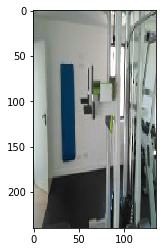

In [8]:
def lookForBest(prediction):
    best = 0
    categories = 6
    for i,probability in enumerate(prediction[0]):
        if probability > prediction[0][best]:
            best = i
    return best

def predictImg(img,realLabel,model):
    prediction = model.predict(img)
    print("\tReal label: \tNode" + str(realLabel) + " - " + str(prediction[0][realLabel]*100) + "%")
    best = lookForBest(prediction);
    print("\tPrediction: \tNode" + str(best) + " - " + str(prediction[0][best]*100) + "%")
    if(realLabel == best):
        return True
    return False

import glob
import os,shutil
from keras.preprocessing import image

totalImages = 0
numTruePositives = 0
label = -1
for directory in glob.glob(commonURL + 'data/validation/*'):
    print(directory)
    label = label + 1
    for imgUrl in glob.glob(directory + "/*"):
        print("Image: " + str(imgUrl))
        img = image.load_img(imgUrl, target_size=(img_width, img_height))
        plt.imshow(img)
        img = image.img_to_array(img)
        img = np.expand_dims(img, axis=0)
        if(predictImg(img,label,model)):
            numTruePositives = numTruePositives + 1
        totalImages = totalImages + 1
        print("Num. true positives: " + str(numTruePositives))
        print("Total Images: " + str(totalImages))
        print("true/total: " + str(numTruePositives/totalImages))

In [ ]:
nb_train_samples = 25000
nb_validation_samples = 2000
epochs = 10
batch_size = 64

# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator( rotation_range = 180)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator()

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

print("paso")

#from sklearn.metrics import confusion_matrix
predictions = model.predict_generator(validation_generator, nb_validation_samples/batch_size)

def lookForCategory(predictions):
    best = 0
    category = 6
    i=0
    for prediction in predictions:
        if best <= prediction:
            category = i
            best = prediction
        i += 1
    return category, best

correct = 0
print("paso")
for i, real in enumerate(validation_generator.filenames):
    print("paso")
    realNode = real.split('/')[0].split('Nodo')[1]
    realNode = int(realNode)-1
    nodePrediction, probability = lookForCategory(predictions[i])
    print("Image: " + str(real))
    print("\tReal label: \t" + real.split('/')[0] + " - " + str(predictions[i][realNode]*100) + "%")
    print("\tPrediction: \tNode" + str(nodePrediction+1) + " - " + str(probability*100) + "%")
    if predictions[i][realNode] >= 0.5:
        correct += 1
print("\nCorrect: " + str(correct))
print("\nAccuracy: " + str(correct/nb_validation_samples))